In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/prakh/Desktop/credit-card-customers-analysis/data/Cleaned_bankchurnes.csv')

In [3]:
print(df)


       Unnamed: 0  CLIENTNUM     Attrition_Flag  Customer_Age Gender  \
0               0  768805383  Existing Customer            45      M   
1               1  818770008  Existing Customer            49      F   
2               2  713982108  Existing Customer            51      M   
3               3  769911858  Existing Customer            40      F   
4               4  709106358  Existing Customer            40      M   
...           ...        ...                ...           ...    ...   
10122       10122  772366833  Existing Customer            50      M   
10123       10123  710638233  Attrited Customer            41      M   
10124       10124  716506083  Attrited Customer            44      F   
10125       10125  717406983  Attrited Customer            30      M   
10126       10126  714337233  Attrited Customer            43      F   

       Dependent_count Education_Level Marital_Status Income_Category  \
0                    3     High School        Married     $60K

In [5]:
#Objective: Select relevant features for clustering that represent the customer's behavior and demographics.
#a. Choose Relevant Features
#Based on the objectives of the segmentation, choose features related to customer demographics and credit card usage:
# Select relevant features for clustering
features = df[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 
                      'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 
                      'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
                      'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
                      'Avg_Utilization_Ratio'] + 
                     list(df.filter(like='Gender_')) +
                     list(df.filter(like='Education_Level_')) +
                     list(df.filter(like='Marital_Status_')) +
                     list(df.filter(like='Income_Category_')) +
                     list(df.filter(like='Card_Category_'))]


In [7]:
#b. Standardize the Features
#Standardize the features to bring all variables to the same scale.
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


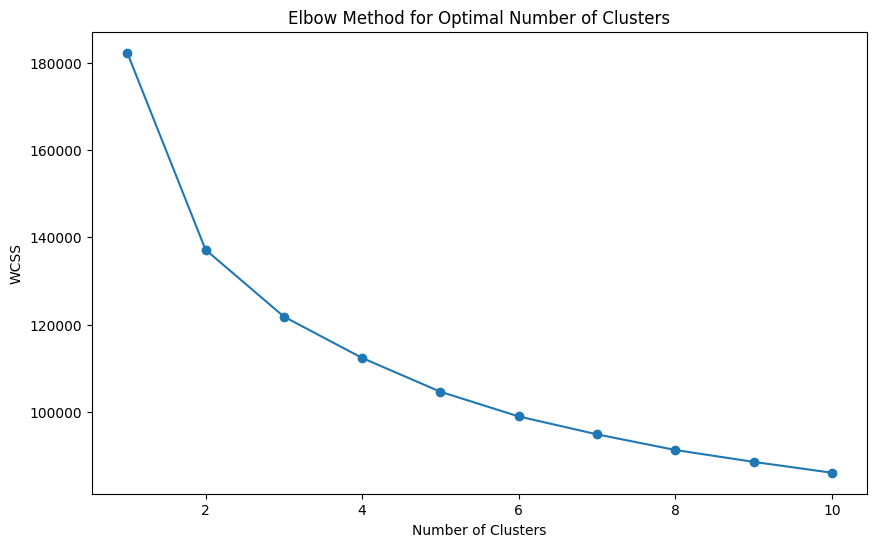

In [8]:
#3. Determine the Optimal Number of Clusters
#Objective: Find the optimal number of clusters for the K-Means algorithm.
#a. Elbow Method
#Plot the Elbow curve to determine the optimal number of clusters.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
wcss = []  # List to store Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


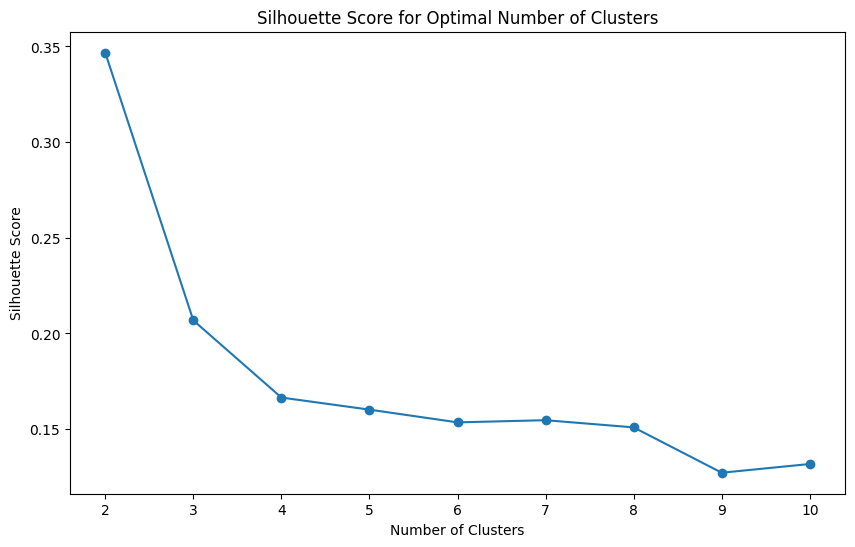

In [9]:
#b. Silhouette Analysis
#Plot the Silhouette scores to validate the choice of the number of clusters.
from sklearn.metrics import silhouette_score

# Silhouette Analysis
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [10]:
#4. Clustering
#Objective: Apply K-Means clustering with the optimal number of clusters.
# Apply K-Means clustering with the optimal number of clusters (e.g., 4)
optimal_clusters = 4  # Based on the Elbow method and Silhouette analysis
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels


In [12]:
#5. Segment Analysis
#Objective: Analyze each segment to identify unique behaviors and characteristics.
# Analyze segments
# Analyze segments with correct column names
cluster_summary = df.groupby('Cluster').agg({
    'Customer_Age': ['mean', 'std'],
    'Dependent_count': ['mean', 'std'],
    'Months_on_book': ['mean', 'std'],
    'Total_Relationship_Count': ['mean', 'std'],
    'Months_Inactive_12_mon': ['mean', 'std'],
    'Contacts_Count_12_mon': ['mean', 'std'],
    'Credit_Limit': ['mean', 'std'],
    'Total_Revolving_Bal': ['mean', 'std'],
    'Avg_Open_To_Buy': ['mean', 'std'],
    'Total_Amt_Chng_Q4_Q1': ['mean', 'std'],
    'Total_Trans_Amt': ['mean', 'std'],
    'Total_Trans_Ct': ['mean', 'std'],
    'Total_Ct_Chng_Q4_Q1': ['mean', 'std'],
    'Avg_Utilization_Ratio': ['mean', 'std']
})


cluster_summary


Customer_Age           Dependent_count           Months_on_book  \
                mean       std            mean       std           mean   
Cluster                                                                   
0          45.555058  7.415828        2.384064  1.289688      35.332140   
1          46.109948  7.766194        2.407504  1.273038      35.859511   
2          46.659496  7.665652        2.402581  1.275010      36.178242   
3          46.594930  8.504871        2.258809  1.328876      36.054246   

                  Total_Relationship_Count           Months_Inactive_12_mon  \
              std                     mean       std                   mean   
Cluster                                                                       
0        7.651210                 2.140555  1.155062               2.191585   
1        7.733432                 4.286213  1.321953               2.268761   
2        7.796548                 3.279656  1.577782               2.693301   
3        8.358784                 4.093029  1.446901               2.301394   

                   ... Total_Amt_Chng_Q4_Q1           Total_Trans_Amt  \
              std  ...                 mean       std            mean   
Cluster            ...                                                  
0        0.984194  ...             0.767498  0.104704    12465.093107   
1        1.007632  ...             0.768290  0.235206     3313.636998   
2        0.899623  ...             0.694277  0.214924     3095.025814   
3        1.032514  ...             0.777606  0.225490     3611.858555   

                     Total_Trans_Ct            Total_Ct_Chng_Q4_Q1            \
                 std           mean        std                mean       std   
Cluster                                                                        
0        3311.276705     104.114593  13.406631            0.718133  0.107580   
1        1297.155537      62.013962  18.620440            0.740705  0.251309   
2        2308.227629      44.933620  14.568429            0.554386  0.226854   
3        1445.564396      64.440304  19.146985            0.750822  0.231349   

        Avg_Utilization_Ratio            
                         mean       std  
Cluster                                  
0                    0.161456  0.162702  
1                    0.063031  0.067298  
2                    0.162475  0.264458  
3                    0.538011  0.194000  

[4 rows x 28 columns]

# Actionable Insights

- **Segment 0**: High-income, older customers with low credit utilization. Consider offering exclusive credit card features and premium rewards.
- **Segment 1**: Younger, single customers with high credit utilization. Target them with offers for increased credit limits or financial management tools.
- **Segment 2**: Moderate-income, mid-aged customers with high credit card usage. Offer loyalty rewards or incentives for continued use.
- **Segment 3**: Low-income, older customers with low engagement. Focus on re-engagement strategies such as educational resources or special promotions.


In [13]:
print(df)

       Unnamed: 0  CLIENTNUM     Attrition_Flag  Customer_Age Gender  \
0               0  768805383  Existing Customer            45      M   
1               1  818770008  Existing Customer            49      F   
2               2  713982108  Existing Customer            51      M   
3               3  769911858  Existing Customer            40      F   
4               4  709106358  Existing Customer            40      M   
...           ...        ...                ...           ...    ...   
10122       10122  772366833  Existing Customer            50      M   
10123       10123  710638233  Attrited Customer            41      M   
10124       10124  716506083  Attrited Customer            44      F   
10125       10125  717406983  Attrited Customer            30      M   
10126       10126  714337233  Attrited Customer            43      F   

       Dependent_count Education_Level Marital_Status Income_Category  \
0                    3     High School        Married     $60K

In [15]:
#Behavioral Analysis
# Select key features for behavioral analysis of each segment
features = ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Analyze behavior within each cluster
for feature in features:
    cluster_behavior = df.groupby('Cluster')[feature].agg(['mean', 'std', 'min', 'max'])
    print(f"Behavior analysis for {feature}:\n", cluster_behavior, "\n")


Behavior analysis for Total_Relationship_Count:
              mean       std  min  max
Cluster                              
0        2.140555  1.155062    1    6
1        4.286213  1.321953    1    6
2        3.279656  1.577782    1    6
3        4.093029  1.446901    1    6 

Behavior analysis for Months_Inactive_12_mon:
              mean       std  min  max
Cluster                              
0        2.191585  0.984194    1    6
1        2.268761  1.007632    0    6
2        2.693301  0.899623    0    6
3        2.301394  1.032514    0    6 

Behavior analysis for Total_Trans_Amt:
                  mean          std   min    max
Cluster                                        
0        12465.093107  3311.276705  4401  18484
1         3313.636998  1297.155537   816   8216
2         3095.025814  2308.227629   510  10583
3         3611.858555  1445.564396   893   9331 

Behavior analysis for Total_Trans_Ct:
                mean        std  min  max
Cluster                           

In [16]:
#Actionable Insights for Targeted Marketing
# Define a function to generate insights based on analysis
def generate_insights(cluster_summary):
    insights = {}
    
    for cluster in cluster_summary.index:
        insights[cluster] = {}
        
        # Example insights based on the mean values of key features
        if cluster_summary.loc[cluster, ('Total_Trans_Amt', 'mean')] > 10000:
            insights[cluster]['High Transaction Amount'] = "Target with premium products and loyalty programs."
        else:
            insights[cluster]['Low Transaction Amount'] = "Consider cross-selling and up-selling opportunities."
        
        if cluster_summary.loc[cluster, ('Months_Inactive_12_mon', 'mean')] > 3:
            insights[cluster]['High Inactivity'] = "Re-engage with special offers and personalized communication."
        else:
            insights[cluster]['Low Inactivity'] = "Maintain engagement with regular updates and rewards."
        
        if cluster_summary.loc[cluster, ('Avg_Utilization_Ratio', 'mean')] > 0.3:
            insights[cluster]['High Utilization'] = "Offer credit limit increases or premium credit products."
        else:
            insights[cluster]['Low Utilization'] = "Promote usage through incentives and educational content."

    return insights

# Generate insights for each cluster
insights = generate_insights(cluster_summary)
for cluster, cluster_insights in insights.items():
    print(f"Cluster {cluster} Insights:")
    for key, value in cluster_insights.items():
        print(f"  {key}: {value}")
    print()


Cluster 0 Insights:
  High Transaction Amount: Target with premium products and loyalty programs.
  Low Inactivity: Maintain engagement with regular updates and rewards.
  Low Utilization: Promote usage through incentives and educational content.

Cluster 1 Insights:
  Low Transaction Amount: Consider cross-selling and up-selling opportunities.
  Low Inactivity: Maintain engagement with regular updates and rewards.
  Low Utilization: Promote usage through incentives and educational content.

Cluster 2 Insights:
  Low Transaction Amount: Consider cross-selling and up-selling opportunities.
  Low Inactivity: Maintain engagement with regular updates and rewards.
  Low Utilization: Promote usage through incentives and educational content.

Cluster 3 Insights:
  Low Transaction Amount: Consider cross-selling and up-selling opportunities.
  Low Inactivity: Maintain engagement with regular updates and rewards.
  High Utilization: Offer credit limit increases or premium credit products.



# Summary 
The above steps help in understanding each customer segment's unique behaviors and characteristics. By generating actionable insights, targeted marketing strategies can be developed to improve engagement, retention, and revenue for each customer segment. This approach ensures that marketing efforts are data-driven and tailored to the specific needs and behaviors of different customer groups.